# New York City Taxi and Limousine Commission 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib
from matplotlib import pyplot as plt

In [4]:
taxi = pd.read_csv('~/desktop/ttp2/capstone_3/taxi_sample.csv')

In [5]:
#taxi.shape
#taxi.describe()
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  500000 non-null  object 
 1   vendor_id           500000 non-null  int64  
 2   pickup_datetime     500000 non-null  object 
 3   dropoff_datetime    500000 non-null  object 
 4   passenger_count     500000 non-null  int64  
 5   pickup_longitude    500000 non-null  float64
 6   pickup_latitude     500000 non-null  float64
 7   dropoff_longitude   500000 non-null  float64
 8   dropoff_latitude    500000 non-null  float64
 9   store_and_fwd_flag  500000 non-null  object 
 10  trip_duration       500000 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 42.0+ MB


In [6]:
taxi

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id3747120,1,2016-02-19 10:50:21,2016-02-19 11:06:52,1,-73.996262,40.739708,-73.989021,40.743526,N,991
1,id0945209,1,2016-03-13 21:11:23,2016-03-13 21:33:30,1,-73.955566,40.779476,-73.903313,40.746105,N,1327
2,id1965492,2,2016-04-17 19:50:40,2016-04-17 20:08:16,2,-73.994476,40.750340,-73.983673,40.716099,N,1056
3,id2017880,2,2016-06-09 11:10:50,2016-06-09 11:28:32,1,-73.983673,40.743881,-74.003998,40.717060,N,1062
4,id1433638,1,2016-04-09 02:52:33,2016-04-09 03:03:16,3,-73.987015,40.729233,-73.996033,40.753590,N,643
...,...,...,...,...,...,...,...,...,...,...,...
499995,id3591094,2,2016-01-12 17:43:44,2016-01-12 18:06:31,1,-73.967453,40.756359,-74.009987,40.705448,N,1367
499996,id2706575,1,2016-01-20 10:57:24,2016-01-20 11:08:26,1,-73.978302,40.766560,-73.973289,40.754971,N,662
499997,id2863638,2,2016-01-11 19:47:54,2016-01-11 19:53:44,2,-73.930717,40.766140,-73.911072,40.776360,N,350
499998,id0810053,1,2016-03-21 19:03:15,2016-03-21 19:43:09,1,-73.776718,40.645287,-73.964996,40.683578,N,2394


In [7]:
#Convert 'pickup_datetime' and 'dropoff_datetime' from object datatype to datetime datatype

taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])

taxi['dropoff_datetime'] = pd.to_datetime(taxi['dropoff_datetime'])

In [8]:
#Create 'pickup_day'

taxi['pickup_day'] = taxi['pickup_datetime'].dt.day_name()

In [9]:
#Change trip duration from seconds to minutes

taxi['trip_duration'] = ((taxi['dropoff_datetime'] - taxi['pickup_datetime']).dt.total_seconds()/60).round(2) 
taxi

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day
0,id3747120,1,2016-02-19 10:50:21,2016-02-19 11:06:52,1,-73.996262,40.739708,-73.989021,40.743526,N,16.52,Friday
1,id0945209,1,2016-03-13 21:11:23,2016-03-13 21:33:30,1,-73.955566,40.779476,-73.903313,40.746105,N,22.12,Sunday
2,id1965492,2,2016-04-17 19:50:40,2016-04-17 20:08:16,2,-73.994476,40.750340,-73.983673,40.716099,N,17.60,Sunday
3,id2017880,2,2016-06-09 11:10:50,2016-06-09 11:28:32,1,-73.983673,40.743881,-74.003998,40.717060,N,17.70,Thursday
4,id1433638,1,2016-04-09 02:52:33,2016-04-09 03:03:16,3,-73.987015,40.729233,-73.996033,40.753590,N,10.72,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
499995,id3591094,2,2016-01-12 17:43:44,2016-01-12 18:06:31,1,-73.967453,40.756359,-74.009987,40.705448,N,22.78,Tuesday
499996,id2706575,1,2016-01-20 10:57:24,2016-01-20 11:08:26,1,-73.978302,40.766560,-73.973289,40.754971,N,11.03,Wednesday
499997,id2863638,2,2016-01-11 19:47:54,2016-01-11 19:53:44,2,-73.930717,40.766140,-73.911072,40.776360,N,5.83,Monday
499998,id0810053,1,2016-03-21 19:03:15,2016-03-21 19:43:09,1,-73.776718,40.645287,-73.964996,40.683578,N,39.90,Monday


In [10]:
#Combine pickup latitude and longitude

taxi['pickup_lat_long'] = list(zip(taxi.pickup_latitude, taxi.pickup_longitude))

In [11]:
#Combine dropoff latitude and longitude

taxi['dropoff_lat_long'] = list(zip(taxi.dropoff_latitude, taxi.dropoff_longitude))

In [14]:
#Calculate distance from given coordinates in miles

#!pip install mpu
#import mpu
taxi['distance'] = taxi.apply(lambda x: mpu.haversine_distance(x['pickup_lat_long'], x['dropoff_lat_long']), 1)
taxi

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_lat_long,dropoff_lat_long,distance
0,id3747120,1,2016-02-19 10:50:21,2016-02-19 11:06:52,1,-73.996262,40.739708,-73.989021,40.743526,N,16.52,Friday,"(40.739707946777344, -73.99626159667969)","(40.74352645874024, -73.98902130126955)",0.743210
1,id0945209,1,2016-03-13 21:11:23,2016-03-13 21:33:30,1,-73.955566,40.779476,-73.903313,40.746105,N,22.12,Sunday,"(40.77947616577149, -73.95556640625)","(40.7461051940918, -73.90331268310547)",5.756459
2,id1965492,2,2016-04-17 19:50:40,2016-04-17 20:08:16,2,-73.994476,40.750340,-73.983673,40.716099,N,17.60,Sunday,"(40.75033950805664, -73.99447631835938)","(40.71609878540039, -73.98367309570312)",3.914695
3,id2017880,2,2016-06-09 11:10:50,2016-06-09 11:28:32,1,-73.983673,40.743881,-74.003998,40.717060,N,17.70,Thursday,"(40.74388122558594, -73.98367309570312)","(40.71706008911133, -74.00399780273438)",3.439123
4,id1433638,1,2016-04-09 02:52:33,2016-04-09 03:03:16,3,-73.987015,40.729233,-73.996033,40.753590,N,10.72,Saturday,"(40.72923278808594, -73.98701477050781)","(40.75358963012695, -73.99603271484375)",2.812901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,id3591094,2,2016-01-12 17:43:44,2016-01-12 18:06:31,1,-73.967453,40.756359,-74.009987,40.705448,N,22.78,Tuesday,"(40.7563591003418, -73.9674530029297)","(40.70544815063477, -74.0099868774414)",6.700165
499996,id2706575,1,2016-01-20 10:57:24,2016-01-20 11:08:26,1,-73.978302,40.766560,-73.973289,40.754971,N,11.03,Wednesday,"(40.76655960083008, -73.97830200195312)","(40.75497055053711, -73.9732894897461)",1.356035
499997,id2863638,2,2016-01-11 19:47:54,2016-01-11 19:53:44,2,-73.930717,40.766140,-73.911072,40.776360,N,5.83,Monday,"(40.76613998413085, -73.93071746826173)","(40.77635955810547, -73.91107177734375)",2.007056
499998,id0810053,1,2016-03-21 19:03:15,2016-03-21 19:43:09,1,-73.776718,40.645287,-73.964996,40.683578,N,39.90,Monday,"(40.645286560058594, -73.77671813964845)","(40.68357849121094, -73.96499633789062)",16.441355


In [15]:
#Group by 'vendor'

vendor = taxi.groupby('vendor_id')
vendor.describe()

passenger_count                                               \
                    count      mean       std  min  25%  50%  75%  max   
vendor_id                                                                
1                232547.0  1.259388  0.612825  0.0  1.0  1.0  1.0  6.0   
2                267453.0  2.016134  1.623134  0.0  1.0  1.0  2.0  8.0   

          pickup_longitude             ... trip_duration            distance  \
                     count       mean  ...           75%       max     count   
vendor_id                              ...                                     
1                 232547.0 -73.974013  ...         17.83  34159.63  232547.0   
2                 267453.0 -73.972804  ...         18.02   1439.78  267453.0   

                                                                               
               mean       std  min       25%       50%       75%          max  
vendor_id                                                                      
1          3.416560  5.119934  0.0  1.227714  2.087514  3.856987  1240.908677  
2          3.474177  4.022043  0.0  1.235609  2.102206  3.908609    97.586212  

[2 rows x 56 columns]

In [16]:
#Group by 'passenger count'

pass_num= taxi.groupby('passenger_count')
pass_num.describe()

vendor_id                                               \
                    count      mean       std  min  25%  50%  75%  max   
passenger_count                                                          
0                    24.0  1.333333  0.481543  1.0  1.0  1.0  2.0  2.0   
1                354340.0  1.467260  0.498928  1.0  1.0  1.0  2.0  2.0   
2                 72045.0  1.560983  0.496271  1.0  1.0  2.0  2.0  2.0   
3                 20633.0  1.615907  0.486392  1.0  1.0  2.0  2.0  2.0   
4                  9548.0  1.578865  0.493767  1.0  1.0  2.0  2.0  2.0   
5                 26895.0  1.995129  0.069622  1.0  2.0  2.0  2.0  2.0   
6                 16514.0  1.996730  0.057092  1.0  2.0  2.0  2.0  2.0   
8                     1.0  2.000000       NaN  2.0  2.0  2.0  2.0  2.0   

                pickup_longitude             ... trip_duration            \
                           count       mean  ...           75%       max   
passenger_count                              ...                           
0                           24.0 -73.957004  ...         5.790     54.05   
1                       354340.0 -73.973471  ...        17.700  32328.93   
2                        72045.0 -73.973038  ...        18.730  34159.63   
3                        20633.0 -73.974103  ...        18.650   1439.42   
4                         9548.0 -73.973925  ...        18.970   1439.65   
5                        26895.0 -73.972213  ...        18.080   1439.23   
6                        16514.0 -73.973215  ...        17.965   1439.23   
8                            1.0 -73.992653  ...         1.730      1.73   

                 distance                                                    \
                    count      mean       std       min       25%       50%   
passenger_count                                                               
0                    24.0  2.081963  4.692339  0.000000  0.002452  0.016016   
1                354340.0  3.384785  4.422568  0.000000  1.219024  2.071817   
2                 72045.0  3.680935  5.605741  0.000000  1.275010  2.176080   
3                 20633.0  3.560908  4.196276  0.000000  1.268869  2.140523   
4                  9548.0  3.632720  4.243437  0.000000  1.257529  2.162604   
5                 26895.0  3.516760  4.043013  0.000000  1.254617  2.117328   
6                 16514.0  3.411402  3.866796  0.000000  1.242668  2.089822   
8                     1.0  5.951853       NaN  5.951853  5.951853  5.951853   

                                        
                      75%          max  
passenger_count                         
0                1.578588    19.013222  
1                3.822497  1240.908677  
2                4.101557   578.842818  
3                4.002949   135.275586  
4                4.078617    35.425092  
5                3.952822    80.287249  
6                3.850286    38.731155  
8                5.951853     5.951853  

[8 rows x 56 columns]

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

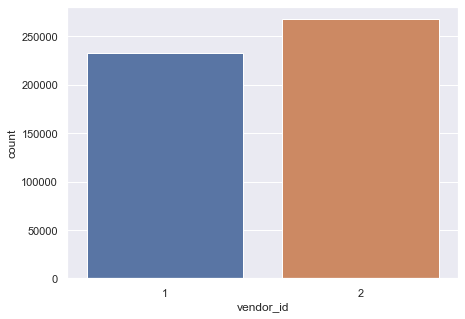

In [17]:
sns.set(rc={'figure.figsize': (7,5)})
sns.countplot(x = 'vendor_id', data = taxi)

<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

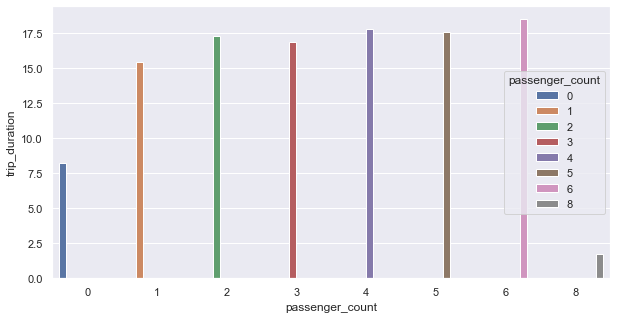

In [18]:
sns.set(rc={'figure.figsize': (10,5)})
sns.barplot(x = 'passenger_count', y = 'trip_duration', hue = 'passenger_count', data = taxi, ci = False)

In [19]:
#Check for rides of 7 passengers

pass_count_7 = taxi['passenger_count'] == 7
taxi.loc[pass_count_7]['passenger_count']

Series([], Name: passenger_count, dtype: int64)

# Look into 'trip_duration'

/Users/Marwin/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration'>

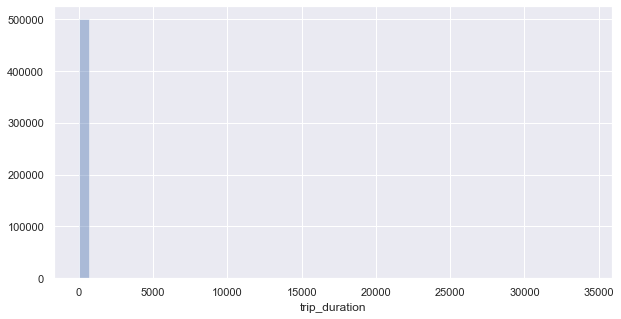

In [21]:
sns.distplot(taxi['trip_duration'],kde=False)

In [22]:
#Check for trip_duration' outliers

#taxi['trip_duration'].mean()
#taxi['trip_duration'].max()
duration_over_120 = taxi['trip_duration'] > 120
taxi.loc[duration_over_120]['trip_duration']

27        1426.50
224       1438.73
783       1438.62
808       1422.27
1975      1422.07
           ...   
498437    1438.62
499300     893.58
499637    1436.40
499921    1421.33
499966    1438.63
Name: trip_duration, Length: 771, dtype: float64

In [23]:
#Drop outliers of 'trip_duration'

taxi.drop(taxi[taxi.trip_duration > 120].index, inplace=True)

In [24]:
#Check for removed outliers

duration_over_119 = taxi['trip_duration'] > 119
taxi.loc[duration_over_119]['trip_duration']

118004    119.85
189092    119.22
Name: trip_duration, dtype: float64

/Users/Marwin/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration'>

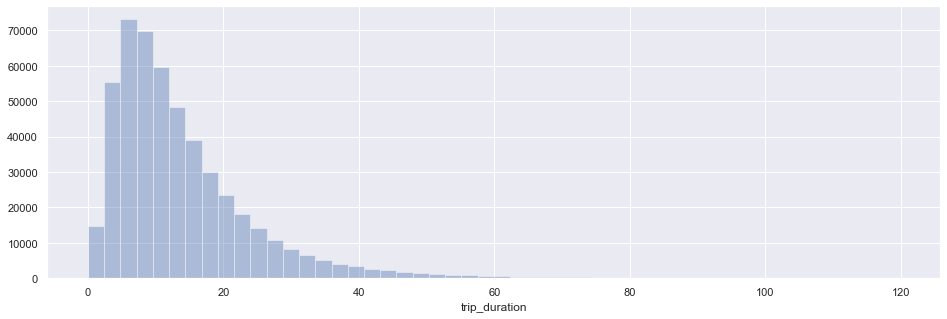

In [25]:
sns.set(rc={'figure.figsize': (16,5)})
sns.distplot(taxi['trip_duration'],kde=False)

(array([2.72599e+05, 1.58961e+05, 4.49380e+04, 1.40170e+04, 5.28100e+03,
        2.06200e+03, 8.71000e+02, 3.32000e+02, 1.19000e+02, 4.90000e+01]),
 array([2.00000e-02, 1.20030e+01, 2.39860e+01, 3.59690e+01, 4.79520e+01,
        5.99350e+01, 7.19180e+01, 8.39010e+01, 9.58840e+01, 1.07867e+02,
        1.19850e+02]),
 <BarContainer object of 10 artists>)

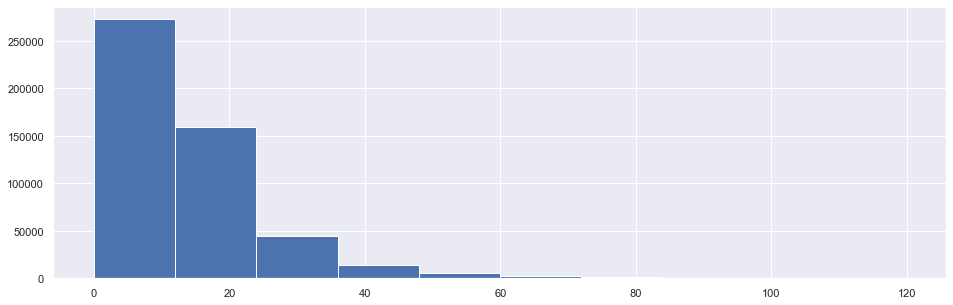

In [26]:
plt.hist('trip_duration', data = taxi)

In [ ]:
# Look into 'distance'

<AxesSubplot:xlabel='distance'>

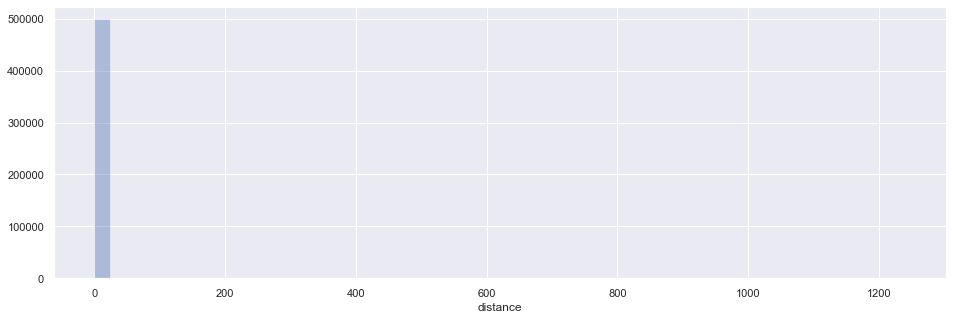

In [28]:
sns.set(rc={'figure.figsize': (16,5)})
sns.distplot(taxi['distance'],kde=False)

In [29]:
#Check for 'distance' outliers

#taxi['distance'].mean()
#taxi['distance'].max()
distance_over_25= taxi['distance'] > 25
taxi.loc[distance_over_25]['distance']

2809      33.693589
2899      27.531211
5499      26.987040
7428      26.267981
8713      25.257146
            ...    
497513    30.252306
498587    25.461218
499294    27.234457
499528    58.478925
499582    26.879600
Name: distance, Length: 486, dtype: float64

In [30]:
#Drop outliers of 'trip_duration'

taxi.drop(taxi[taxi.distance > 25].index, inplace=True)

In [31]:
#Check for removed outliers

distance_over_25 = taxi['distance'] > 24.9
taxi.loc[distance_over_25]['distance']

32002     24.903383
62981     24.922278
117034    24.977038
178880    24.969677
363953    24.925311
367547    24.958214
368850    24.972030
384104    24.986156
487351    24.929622
494099    24.953235
Name: distance, dtype: float64

/Users/Marwin/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='distance'>

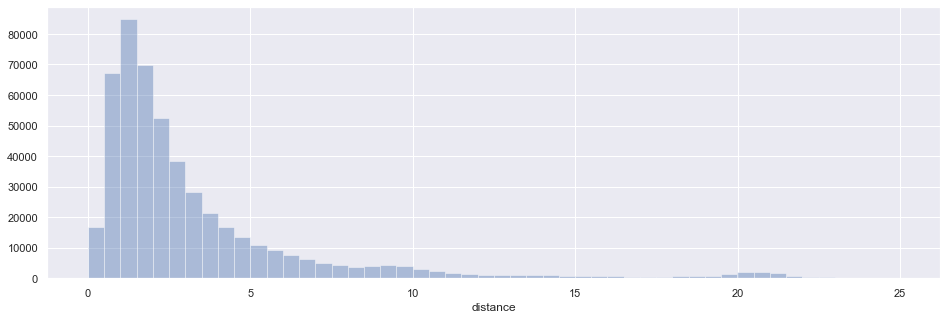

In [32]:
sns.set(rc={'figure.figsize': (16,5)})
sns.distplot(taxi['distance'],kde=False)

(array([290852., 118334.,  38851.,  20594.,   9901.,   5150.,   3172.,
          4121.,   6967.,    801.]),
 array([ 0.        ,  2.4986156 ,  4.9972312 ,  7.49584679,  9.99446239,
        12.49307799, 14.99169359, 17.49030918, 19.98892478, 22.48754038,
        24.98615598]),
 <BarContainer object of 10 artists>)

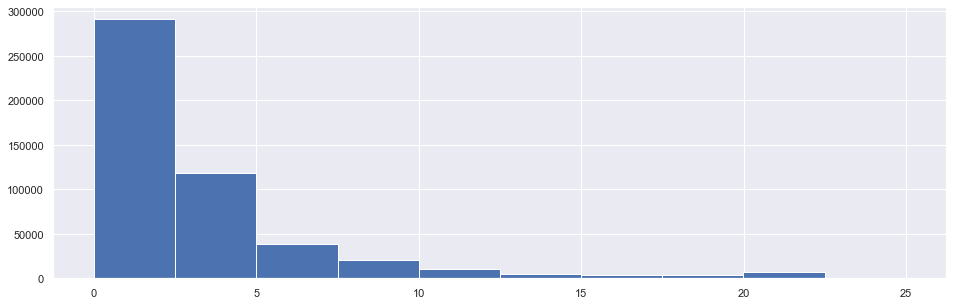

In [33]:
plt.hist('distance', data = taxi)

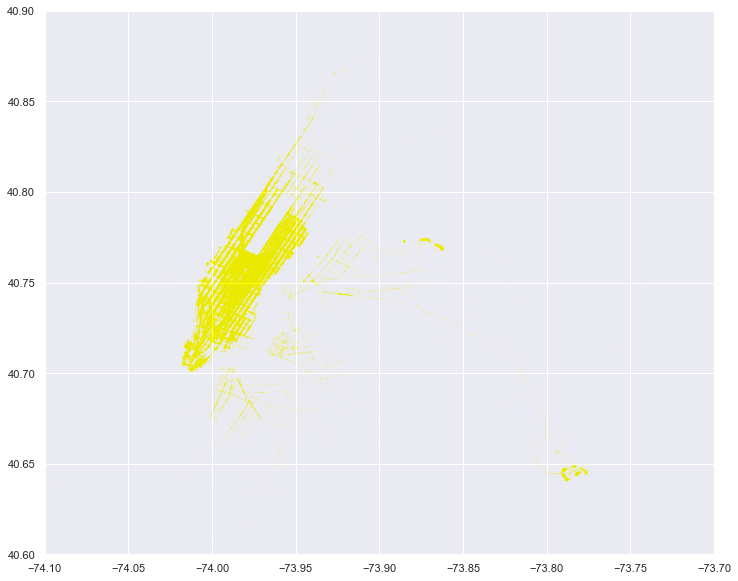

In [34]:
#Map pickup locations

fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(12,10))
plt.ylim(40.6, 40.9)
plt.xlim(-74.1,-73.7)
ax.scatter(taxi['pickup_longitude'],taxi['pickup_latitude'], s=0.0002, alpha=1, color= 'yellow')
plt.rcParams['axes.facecolor'] = '2B2D2F'
plt.rcParams["axes.grid"] = False

In [35]:
#Vendor_1 and vendor_2 assignment

vendor_1 = taxi['vendor_id'] == 1
vendor_2 = taxi['vendor_id'] == 2

In [36]:
#Avg 'trip_duration' for vendor_1 and vendor_2

taxi[vendor_1]['trip_duration'].mean(), taxi[vendor_2]['trip_duration'].mean()

(13.823126592630857, 13.98901382388157)

In [71]:
#Ttest 'trip_duration' for vendor_1 and vendor_2

stats.ttest_ind(taxi[vendor_1]['trip_duration'], taxi[vendor_2]['trip_duration'], equal_var=False)

Ttest_indResult(statistic=-5.391688099077136, pvalue=6.983086128216754e-08)

In [40]:
#standard deviation for 'trip_duration' for vendor_1 and vendor_2

taxi[vendor_1]['trip_duration'].std(), taxi[vendor_2]['trip_duration'].std()

(10.74034269187617, 10.950500950998052)

In [ ]:
# Null Hypothesis, Alternative Hypothesis, and Ttest Result

H0: The avg duration for the two vendors is not different

H1: The avg duration for the two vendors is different

Result: Reject the Null Hypothesis because pvalue=7.441885271979736e-09 and it is significantly lower than 0.05

In [42]:
##Avg 'distance' for vendor_1, vendor_2

taxi[vendor_1]['distance'].mean(), taxi[vendor_2]['distance'].mean()

(3.3766582810446835, 3.438821111217524)

In [43]:
#Ttest 'distance' for vendor_1 and vendor_2 

stats.ttest_ind(taxi[vendor_1]['distance'], taxi[vendor_2]['distance'], equal_var=False)

Ttest_indResult(statistic=-5.718775689797707, pvalue=1.0735607906483357e-08)

In [44]:
#standard deviation for 'trip_duration' for vendor_1 and vendor_2

taxi[vendor_1]['distance'].std(), taxi[vendor_2]['distance'].std()

(3.7810849677629976, 3.8838386804128797)

In [ ]:
#taxi.to_csv('~/desktop/ttp2/capstone_3/taxi_sample_tue.csv')